# Polynomial Regression

## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [9]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Polynomial Regression model on the Training set

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [12]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.67 463.28]]


## Evaluating the Model Performance

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9458193735861526

## Plot partial dependence for each feature 

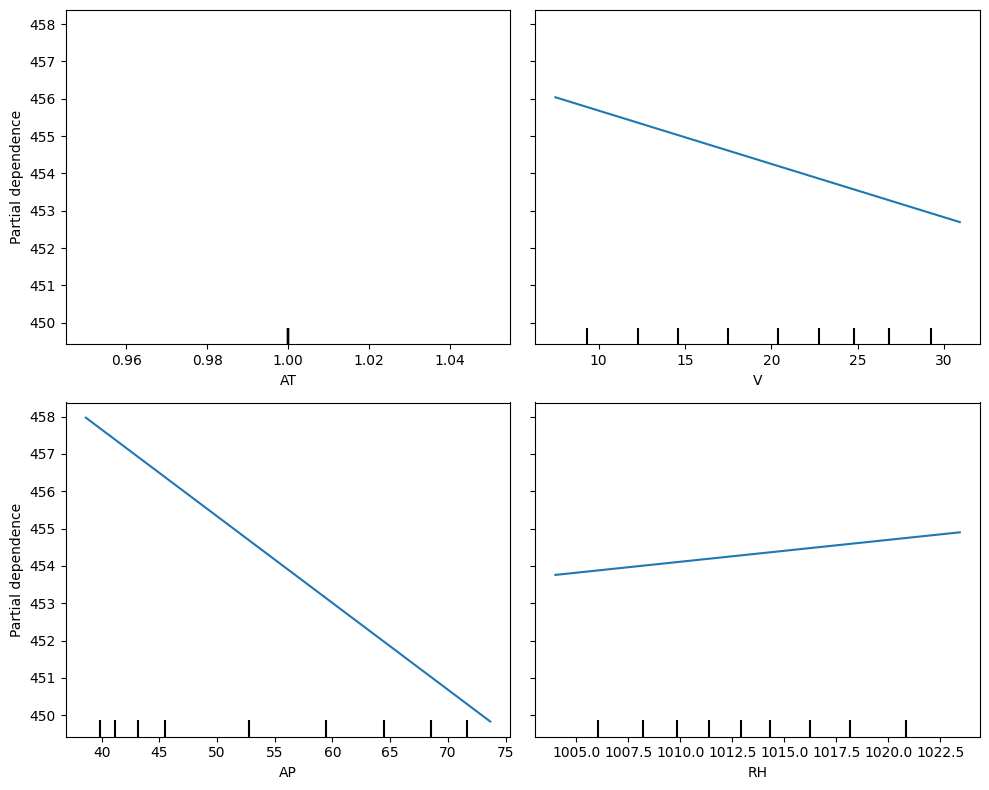

In [18]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = [0, 1, 2, 3] 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
PartialDependenceDisplay.from_estimator(regressor, poly_reg.transform(X_train), features=features, feature_names=['AT', 'V', 'AP', 'RH'], ax=ax)
plt.tight_layout() 
plt.show()
